# Startup

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
root_path = '/gdrive/My Drive/Colab Data/CRISPR Off Target/'
data_dir = root_path + '2018_DeepCRISPR/'
data_path = data_dir + 'all_off_target.csv'
resource_dir = data_dir + "Resources/"
figure_dir = resource_dir + "Figures/"

In [3]:
import pandas as pd

k562 = pd.read_csv(data_dir + "k562_off_target.csv")
print(k562.shape)
print(k562.head(5))
print(k562["label"].value_counts())

(20319, 3)
              Target sgRNA         Off Target sgRNA  label
0  AAATGAGAAGAAGAGGCACAGGG  GCATGAGAAGAAGAGACATAGCC      0
1  AAATGAGAAGAAGAGGCACAGGG  GAAGAAGAAGAAGAGGAAGAGGA      0
2  TGACATCAATTATTATACATCGG  TGTCATCAATTATTAGGATTCGT      0
3  GACACCGAAGCAGAGTTTTTAGG  TACACCAAAGCAGAGTTTGGAGA      0
4  AAATGAGAAGAAGAGGCACAGGG  GAAGAAGAGGAAGAGACACAAGG      0
0    20199
1      120
Name: label, dtype: int64


In [4]:
import pandas as pd

hek293 = pd.read_csv(data_dir + "hek293_off_target.csv")
print(hek293.shape)
print(hek293.head(5))
print(hek293["label"].value_counts())

(132914, 3)
              Target sgRNA         Off Target sgRNA  label
0  GCCTCTTTCCCACCCACCTTGGG  GTCTCTTTCCCAGCGACCTGGGG      0
1  GACTTGTTTTCATTGTTCTCAGG  GAGTCATTTTCATTGTCTTCATG      0
2  GGTGAGTGAGTGTGTGCGTGTGG  TGTGAGTGTGTGTGTGTGTGTGT      0
3  GGTGAGTGAGTGTGTGCGTGTGG  TGTGTGTTCGTGTGTGCGTGTGT      0
4  GCCTCCCCAAAGCCTGGCCAGGG  GCTTCTCCAAAGCCTTCAGAGGG      0
0    132378
1       536
Name: label, dtype: int64


In [5]:
import pandas as pd

all = pd.read_csv(data_dir + "all_off_target.csv")
print(all.shape)
print(all.head(5))
print(all["label"].value_counts())

(153233, 3)
              Target sgRNA         Off Target sgRNA  label
0  AAATGAGAAGAAGAGGCACAGGG  GCATGAGAAGAAGAGACATAGCC      0
1  AAATGAGAAGAAGAGGCACAGGG  GAAGAAGAAGAAGAGGAAGAGGA      0
2  TGACATCAATTATTATACATCGG  TGTCATCAATTATTAGGATTCGT      0
3  GACACCGAAGCAGAGTTTTTAGG  TACACCAAAGCAGAGTTTGGAGA      0
4  AAATGAGAAGAAGAGGCACAGGG  GAAGAAGAGGAAGAGACACAAGG      0
0    152577
1       656
Name: label, dtype: int64


In [ ]:
!pip install captum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.1 MB/s eta 0:00:00


In [ ]:
# Initial imports
import numpy as np

import torch

from captum.attr import IntegratedGradients
from captum.attr import LayerConductance
from captum.attr import NeuronConductance

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import pandas as pd

# Feature Attributions

In [ ]:
# Helper method to print importances and visualize distribution
def visualize_importances(feature_names, importances, plot=True, axis_title="Features", save_as="plt.pdf", y_label = None):
    # print(title)
    for i in range(len(feature_names)):
        print(feature_names[i], ": ", '%.3f'%(importances[i]))
    x_pos = (np.arange(len(feature_names)))
    if plot:
        plt.figure(figsize=(12,8))
        plt.bar(x_pos, importances, align='center')
        plt.xticks(x_pos, feature_names, wrap=True)
        plt.xticks(rotation=45, ha='right')
        plt.xlabel(axis_title)
        if y_label:
            plt.ylabel(y_label)
        # plt.figure(figsize=(12,8))
        plt.savefig(figure_dir + save_as, bbox_inches='tight')
        # plt.title(title)

Pos_23_TG :  -0.875
Pos_18_AT :  0.809
Pos_18_TG :  0.787
Pos_17_TG :  0.754
Pos_18_AG :  0.749
Pos_18_TC :  0.744
Pos_18_AC :  0.721
Pos_23_CG :  -0.706
Pos_17_AG :  0.651
Pos_22_CG :  -0.646
Pos_22_AG :  -0.622
Pos_13_TG :  -0.614
Pos_19_AC :  0.604
Pos_18_T :  0.579
Pos_19_AG :  0.576


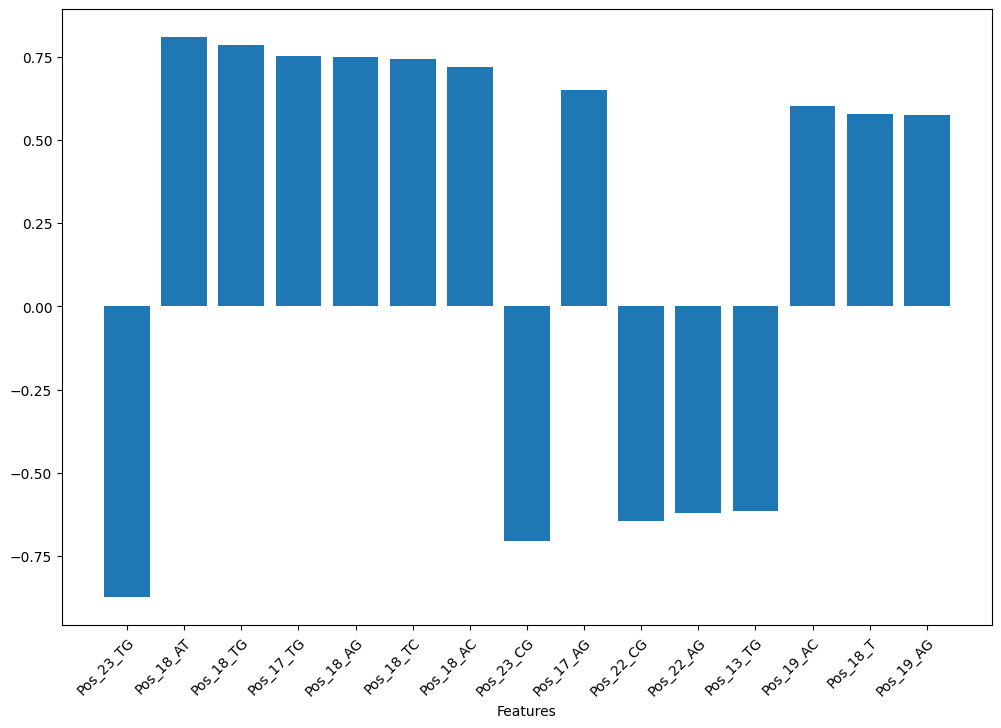

In [ ]:
features = """Pos_23_TG
Pos_18_AT
Pos_18_TG
Pos_17_TG
Pos_18_AG
Pos_18_TC
Pos_18_AC
Pos_23_CG
Pos_17_AG
Pos_22_CG
Pos_22_AG
Pos_13_TG
Pos_19_AC
Pos_18_T
Pos_19_AG"""

values = """-0.8751864173
0.8091105128
0.7873766576
0.7536909038
0.7490618452
0.743569081
0.7213767661
-0.7055345224
0.6506198145
-0.6460274781
-0.6220729143
-0.6140674252
0.6038447497
0.57874862
0.5761342972"""

features = features.split()
values = values.split()
values = [float(x) for x in values]

# print(features)
# print(values)
visualize_importances(features, values, save_as="pos_pred_features.pdf")

Pos_23_TG :  -0.766
Pos_22_TG :  -0.702
Pos_23_CG :  -0.619
Pos_22_CG :  -0.602
Pos_22_AG :  -0.590
Pos_14_TC :  -0.405
Pos_14_TG :  -0.393
Pos_13_TG :  -0.380
Pos_14_AC :  -0.370
Pos_14_AT :  -0.356
Pos_13_TC :  -0.345
Pos_12_TG :  -0.336
Pos_13_CG :  -0.328
Pos_19_CG :  -0.325
Pos_13_AT :  -0.317


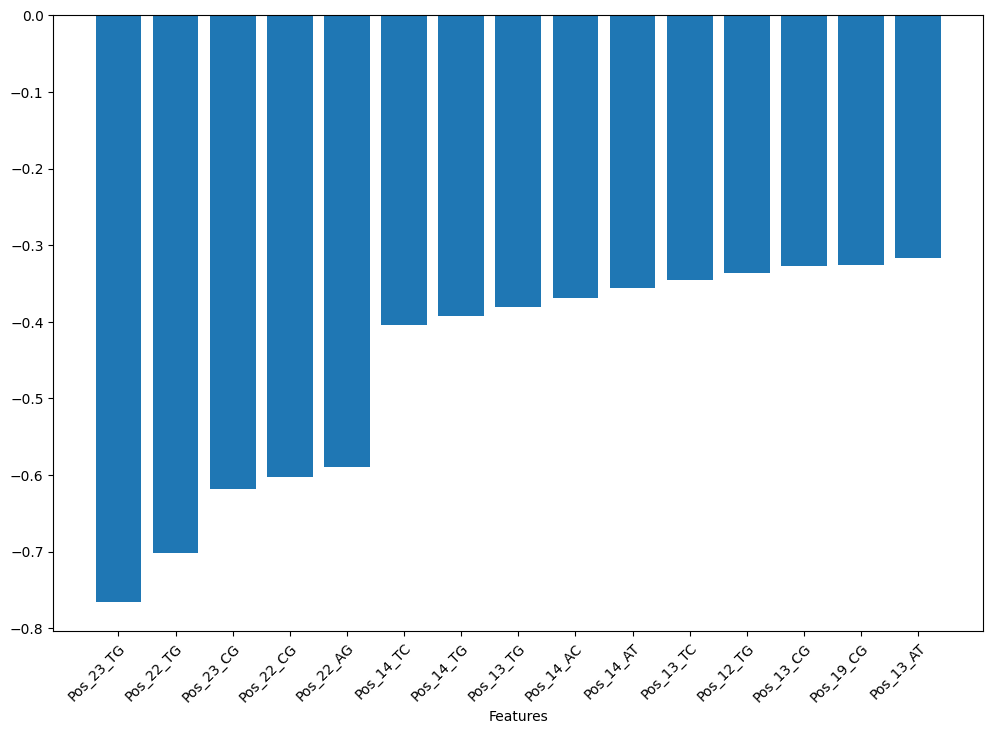

In [ ]:
features = """Pos_23_TG
Pos_22_TG
Pos_23_CG
Pos_22_CG
Pos_22_AG
Pos_14_TC
Pos_14_TG
Pos_13_TG
Pos_14_AC
Pos_14_AT
Pos_13_TC
Pos_12_TG
Pos_13_CG
Pos_19_CG
Pos_13_AT"""

values = """-0.7655427292
-0.7020974719
-0.6186732564
-0.6020330658
-0.5899319409
-0.4046951357
-0.3929797253
-0.3802909392
-0.3695061638
-0.3562709638
-0.3454181911
-0.3359146192
-0.3276374325
-0.3253602696
-0.3173015885"""

features = features.split()
values = values.split()
values = [float(x) for x in values]

# print(features)
# print(values)
visualize_importances(features, values, save_as="neg_pred_features.pdf")

Pos_23_TG :  -0.766
Pos_22_TG :  -0.702
Pos_23_CG :  -0.619
Pos_22_CG :  -0.602
Pos_22_AG :  -0.590
Pos_14_TC :  -0.405
Pos_14_TG :  -0.393
Pos_13_TG :  -0.381
Pos_14_AC :  -0.370
Pos_14_AT :  -0.356
Pos_13_TC :  -0.346
Pos_12_TG :  -0.336
Pos_13_CG :  -0.328
Pos_19_CG :  -0.324
Pos_13_AT :  -0.317


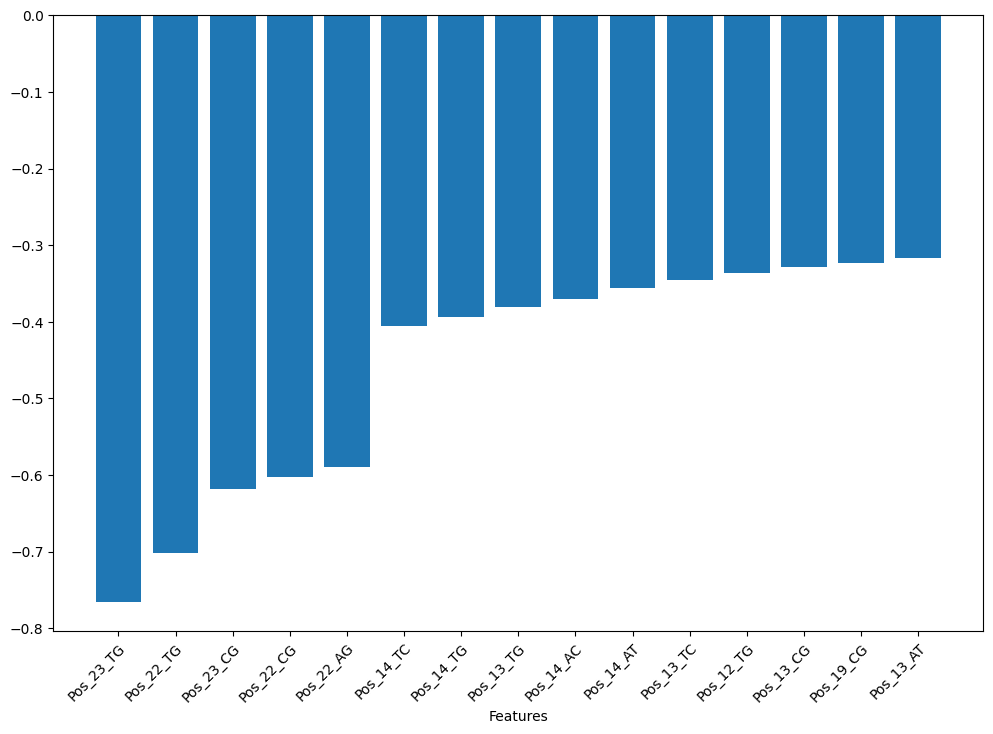

In [ ]:
features = """Pos_23_TG
Pos_22_TG
Pos_23_CG
Pos_22_CG
Pos_22_AG
Pos_14_TC
Pos_14_TG
Pos_13_TG
Pos_14_AC
Pos_14_AT
Pos_13_TC
Pos_12_TG
Pos_13_CG
Pos_19_CG
Pos_13_AT"""

values = """-0.7655502742
-0.7020974719
-0.6186905767
-0.6020711233
-0.5899860503
-0.4054573991
-0.3931597165
-0.3809227676
-0.3699465845
-0.3564259221
-0.3458240709
-0.3359146192
-0.3279790148
-0.323765395
-0.3173687565"""

features = features.split()
values = values.split()
values = [float(x) for x in values]

# print(features)
# print(values)
visualize_importances(features, values, save_as="all_pred_features.pdf")

## Bar Chart for False Positive Features

In [ ]:
features = """Pos_23_G
Pos_22_G
Pos_5_C
Pos_16_G
Pos_10_G
Pos_3_C
Pos_18_C
Pos_11_A
Pos_17_C
Pos_14_C
Pos_6_C
Pos_1_G
Pos_13_C
Pos_7_G
Pos_9_C"""

values = """72
67
53
51
38
37
35
35
34
34
34
32
31
30
29"""

features = features.split()
values = values.split()
values = [float(x) for x in values]

Pos_23_G :  72.000
Pos_22_G :  67.000
Pos_5_C :  53.000
Pos_16_G :  51.000
Pos_10_G :  38.000
Pos_3_C :  37.000
Pos_18_C :  35.000
Pos_11_A :  35.000
Pos_17_C :  34.000
Pos_14_C :  34.000
Pos_6_C :  34.000
Pos_1_G :  32.000
Pos_13_C :  31.000
Pos_7_G :  30.000
Pos_9_C :  29.000


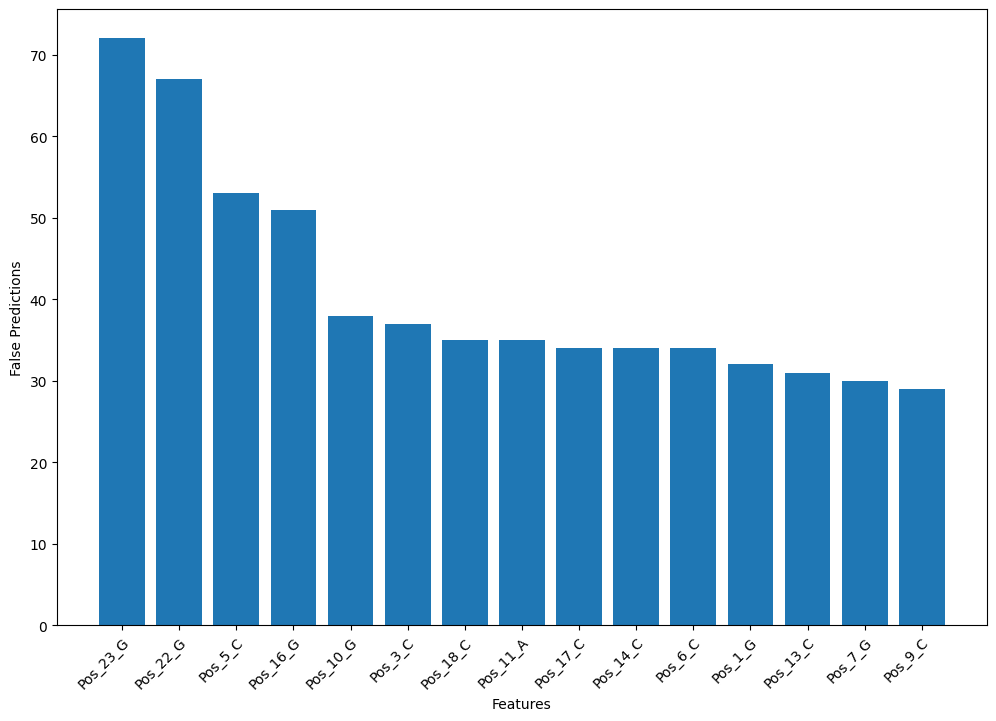

In [ ]:
visualize_importances(features, values, save_as="false_pred_features.pdf", y_label = "False Predictions")

# Layer Importance

['HL_1_N_310', 'HL_1_N_315', 'HL_1_N_116', 'HL_1_N_279', 'HL_1_N_163', 'HL_1_N_135', 'HL_1_N_410', 'HL_1_N_481', 'HL_1_N_484', 'HL_1_N_419', 'HL_1_N_203', 'HL_1_N_296', 'HL_1_N_510', 'HL_1_N_443', 'HL_1_N_253']
[-0.01238907843, 0.01132901708, 0.01086099623, -0.00915922469, 0.009150211919, -0.008625792822, 0.008252991485, -0.008058984706, 0.008034263681, 0.007234457926, -0.007182108853, 0.007174780636, -0.006956072836, 0.006376339212, 0.006163879324]
HL_1_N_310 :  -0.012
HL_1_N_315 :  0.011
HL_1_N_116 :  0.011
HL_1_N_279 :  -0.009
HL_1_N_163 :  0.009
HL_1_N_135 :  -0.009
HL_1_N_410 :  0.008
HL_1_N_481 :  -0.008
HL_1_N_484 :  0.008
HL_1_N_419 :  0.007
HL_1_N_203 :  -0.007
HL_1_N_296 :  0.007
HL_1_N_510 :  -0.007
HL_1_N_443 :  0.006
HL_1_N_253 :  0.006


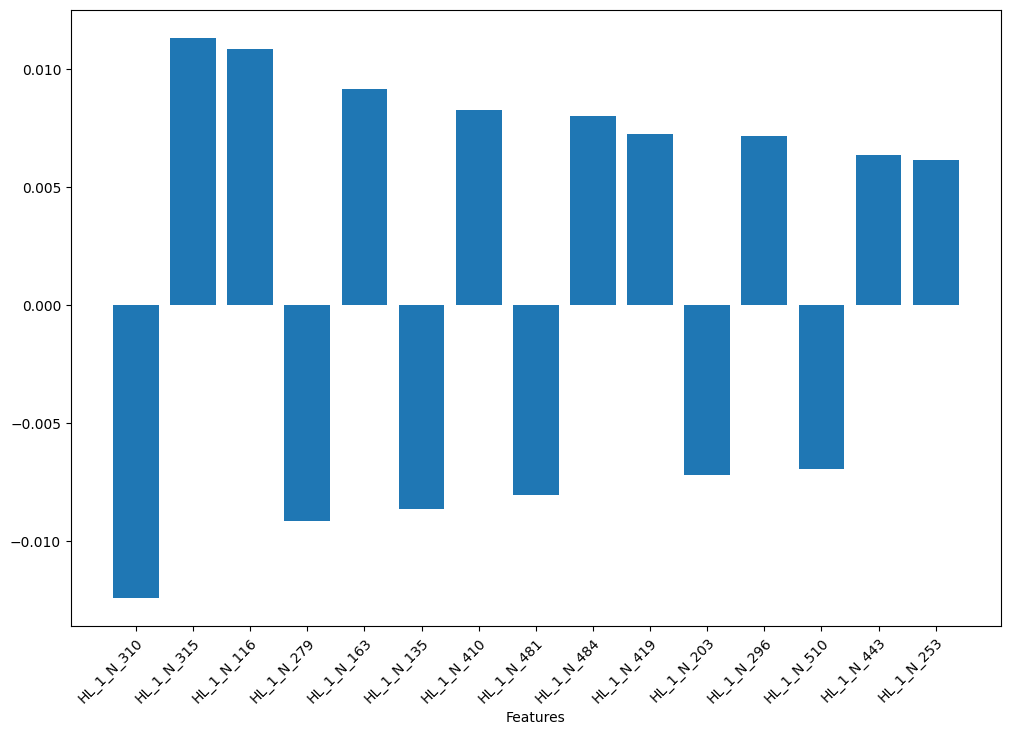

In [ ]:
features = """HL_1_N_310
HL_1_N_315
HL_1_N_116
HL_1_N_279
HL_1_N_163
HL_1_N_135
HL_1_N_410
HL_1_N_481
HL_1_N_484
HL_1_N_419
HL_1_N_203
HL_1_N_296
HL_1_N_510
HL_1_N_443
HL_1_N_253"""

values = """-0.01238907843
0.01132901708
0.01086099623
-0.00915922469
0.009150211919
-0.008625792822
0.008252991485
-0.008058984706
0.008034263681
0.007234457926
-0.007182108853
0.007174780636
-0.006956072836
0.006376339212
0.006163879324"""

features = features.split()
values = values.split()
values = [float(x) for x in values]

print(features)
print(values)
visualize_importances(features, values, save_as="pos_pred_layers.pdf")

['HL_1_N_215', 'HL_1_N_301', 'HL_1_N_310', 'HL_1_N_475', 'HL_1_N_135', 'HL_1_N_279', 'HL_1_N_203', 'HL_1_N_13', 'HL_1_N_481', 'HL_1_N_302', 'HL_1_N_78', 'HL_1_N_188', 'HL_1_N_315', 'HL_1_N_74', 'HL_1_N_269']
[-0.0461900428, -0.04547155228, -0.04440767875, -0.04326612185, -0.03673218784, -0.03598274663, -0.03598060612, -0.03593065094, -0.03503903556, -0.03490175801, -0.03219597468, -0.03207816317, 0.03164142553, -0.03107963017, 0.0284955097]
HL_1_N_215 :  -0.046
HL_1_N_301 :  -0.045
HL_1_N_310 :  -0.044
HL_1_N_475 :  -0.043
HL_1_N_135 :  -0.037
HL_1_N_279 :  -0.036
HL_1_N_203 :  -0.036
HL_1_N_13 :  -0.036
HL_1_N_481 :  -0.035
HL_1_N_302 :  -0.035
HL_1_N_78 :  -0.032
HL_1_N_188 :  -0.032
HL_1_N_315 :  0.032
HL_1_N_74 :  -0.031
HL_1_N_269 :  0.028


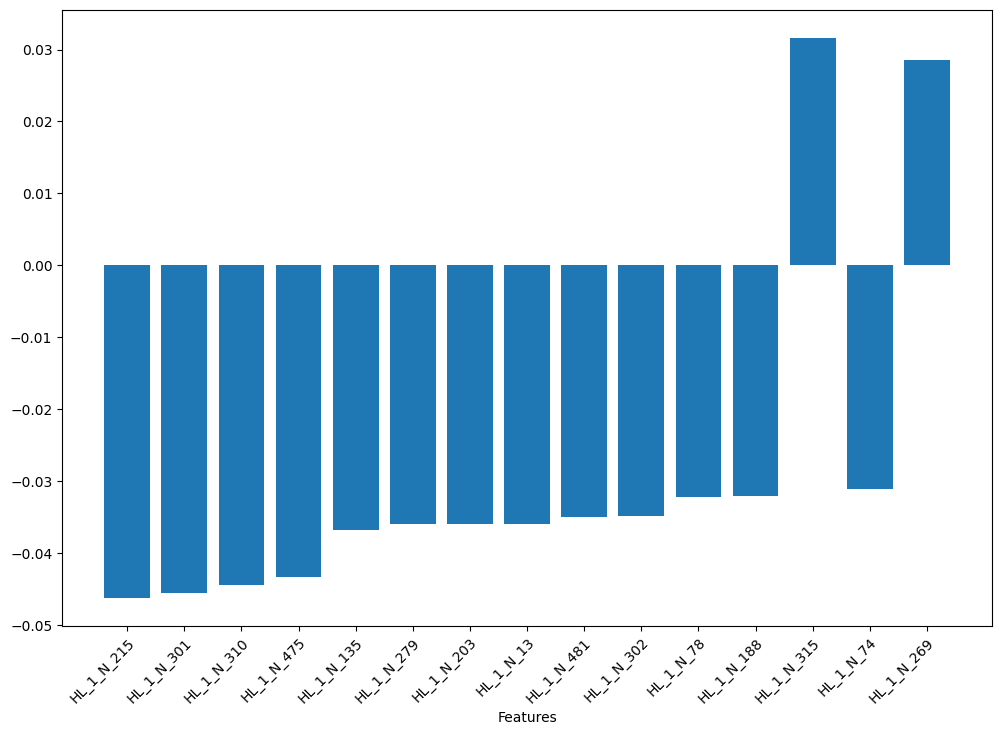

In [ ]:
features = """HL_1_N_215
HL_1_N_301
HL_1_N_310
HL_1_N_475
HL_1_N_135
HL_1_N_279
HL_1_N_203
HL_1_N_13
HL_1_N_481
HL_1_N_302
HL_1_N_78
HL_1_N_188
HL_1_N_315
HL_1_N_74
HL_1_N_269"""

values = """-0.0461900428
-0.04547155228
-0.04440767875
-0.04326612185
-0.03673218784
-0.03598274663
-0.03598060612
-0.03593065094
-0.03503903556
-0.03490175801
-0.03219597468
-0.03207816317
0.03164142553
-0.03107963017
0.0284955097"""

features = features.split()
values = values.split()
values = [float(x) for x in values]

print(features)
print(values)
visualize_importances(features, values, save_as="neg_pred_layers.pdf")

['HL_1_N_215', 'HL_1_N_301', 'HL_1_N_310', 'HL_1_N_475', 'HL_1_N_135', 'HL_1_N_279', 'HL_1_N_203', 'HL_1_N_13', 'HL_1_N_481', 'HL_1_N_302', 'HL_1_N_78', 'HL_1_N_188', 'HL_1_N_315', 'HL_1_N_74', 'HL_1_N_269']
[-0.04603868801, -0.04532089216, -0.04429380048, -0.04312129657, -0.03663222383, -0.03588734532, -0.03587818056, -0.03580737898, -0.03494307754, -0.03477446588, -0.03208771916, -0.03198322023, 0.03156918184, -0.0309621033, 0.02841393964]
HL_1_N_215 :  -0.046
HL_1_N_301 :  -0.045
HL_1_N_310 :  -0.044
HL_1_N_475 :  -0.043
HL_1_N_135 :  -0.037
HL_1_N_279 :  -0.036
HL_1_N_203 :  -0.036
HL_1_N_13 :  -0.036
HL_1_N_481 :  -0.035
HL_1_N_302 :  -0.035
HL_1_N_78 :  -0.032
HL_1_N_188 :  -0.032
HL_1_N_315 :  0.032
HL_1_N_74 :  -0.031
HL_1_N_269 :  0.028


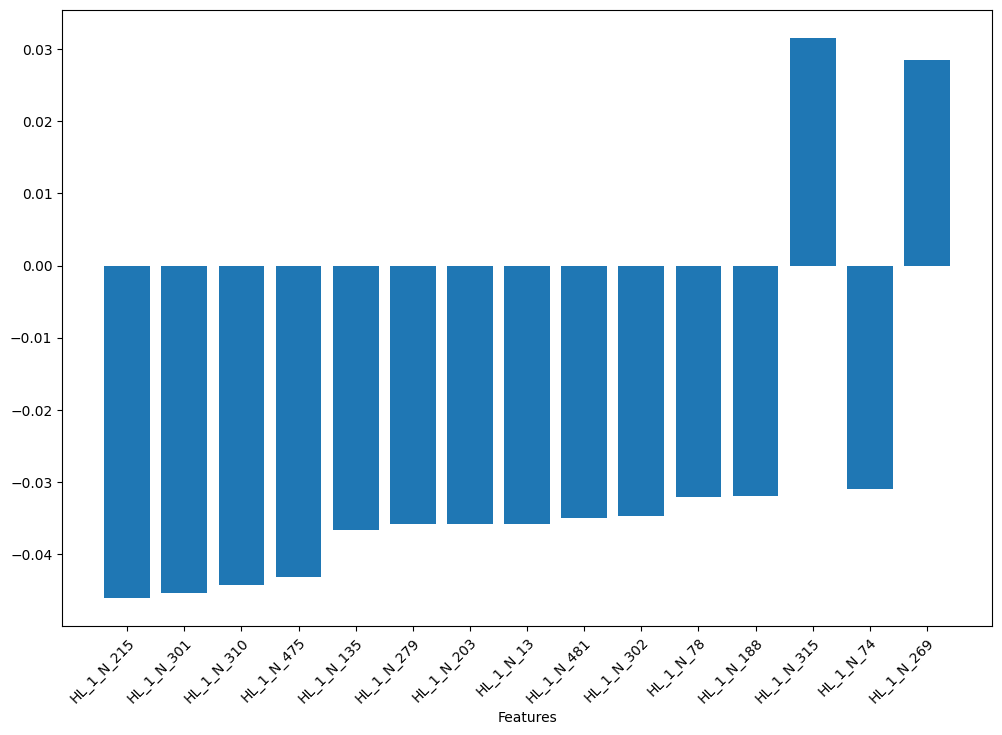

In [ ]:
features = """HL_1_N_215
HL_1_N_301
HL_1_N_310
HL_1_N_475
HL_1_N_135
HL_1_N_279
HL_1_N_203
HL_1_N_13
HL_1_N_481
HL_1_N_302
HL_1_N_78
HL_1_N_188
HL_1_N_315
HL_1_N_74
HL_1_N_269"""

values = """-0.04603868801
-0.04532089216
-0.04429380048
-0.04312129657
-0.03663222383
-0.03588734532
-0.03587818056
-0.03580737898
-0.03494307754
-0.03477446588
-0.03208771916
-0.03198322023
0.03156918184
-0.0309621033
0.02841393964"""

features = features.split()
values = values.split()
values = [float(x) for x in values]

print(features)
print(values)
visualize_importances(features, values, save_as="all_pred_layers.pdf")

['Pos_20_AG', 'Pos_21_AC', 'Pos_21_AG', 'Pos_21_AT', 'Pos_20_AC', 'Pos_20_AT', 'Pos_20_CG', 'Pos_20_TG', 'Pos_22_AG', 'Pos_19_AG', 'Pos_19_TG', 'Pos_19_TC', 'Pos_19_CG', 'Pos_21_A', 'Pos_21_CG']
[-0.719164141, -0.6955389141, -0.6861007595, -0.6612524365, -0.65453706, -0.639447698, -0.6061387909, -0.5937527064, -0.5800316287, -0.5782359061, -0.5631385538, -0.5513531385, -0.5502162766, -0.5450265469, -0.5404693141]
Pos_20_AG :  -0.719
Pos_21_AC :  -0.696
Pos_21_AG :  -0.686
Pos_21_AT :  -0.661
Pos_20_AC :  -0.655
Pos_20_AT :  -0.639
Pos_20_CG :  -0.606
Pos_20_TG :  -0.594
Pos_22_AG :  -0.580
Pos_19_AG :  -0.578
Pos_19_TG :  -0.563
Pos_19_TC :  -0.551
Pos_19_CG :  -0.550
Pos_21_A :  -0.545
Pos_21_CG :  -0.540


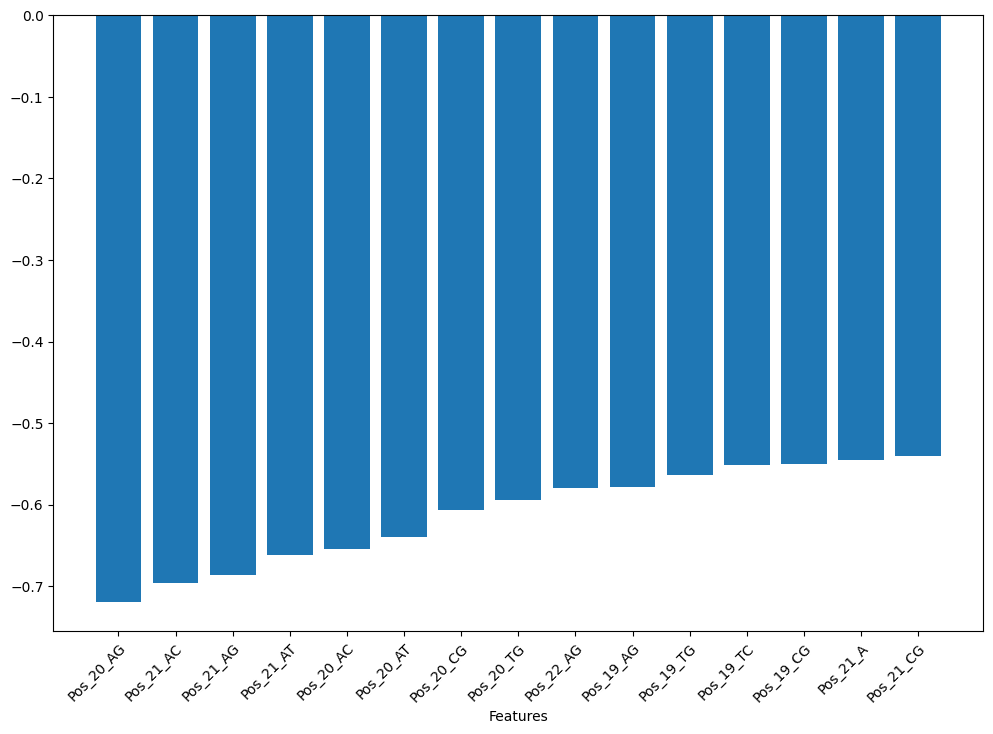

In [ ]:
features = """Pos_20_AG
Pos_21_AC
Pos_21_AG
Pos_21_AT
Pos_20_AC
Pos_20_AT
Pos_20_CG
Pos_20_TG
Pos_22_AG
Pos_19_AG
Pos_19_TG
Pos_19_TC
Pos_19_CG
Pos_21_A
Pos_21_CG"""

values = """-0.719164141
-0.6955389141
-0.6861007595
-0.6612524365
-0.65453706
-0.639447698
-0.6061387909
-0.5937527064
-0.5800316287
-0.5782359061
-0.5631385538
-0.5513531385
-0.5502162766
-0.5450265469
-0.5404693141"""

features = features.split()
values = values.split()
values = [float(x) for x in values]

print(features)
print(values)
visualize_importances(features, values, save_as="all_pred_layers_2.pdf")

# Neuron Importance

['Pos_20_AG', 'Pos_21_AC', 'Pos_21_AG', 'Pos_21_AT', 'Pos_20_AC', 'Pos_20_AT', 'Pos_20_CG', 'Pos_20_TG', 'Pos_22_AG', 'Pos_19_AG', 'Pos_19_TG', 'Pos_19_TC', 'Pos_19_CG', 'Pos_21_A', 'Pos_21_CG']
[-0.719164141, -0.6955389141, -0.6861007595, -0.6612524365, -0.65453706, -0.639447698, -0.6061387909, -0.5937527064, -0.5800316287, -0.5782359061, -0.5631385538, -0.5513531385, -0.5502162766, -0.5450265469, -0.5404693141]
Pos_20_AG :  -0.719
Pos_21_AC :  -0.696
Pos_21_AG :  -0.686
Pos_21_AT :  -0.661
Pos_20_AC :  -0.655
Pos_20_AT :  -0.639
Pos_20_CG :  -0.606
Pos_20_TG :  -0.594
Pos_22_AG :  -0.580
Pos_19_AG :  -0.578
Pos_19_TG :  -0.563
Pos_19_TC :  -0.551
Pos_19_CG :  -0.550
Pos_21_A :  -0.545
Pos_21_CG :  -0.540


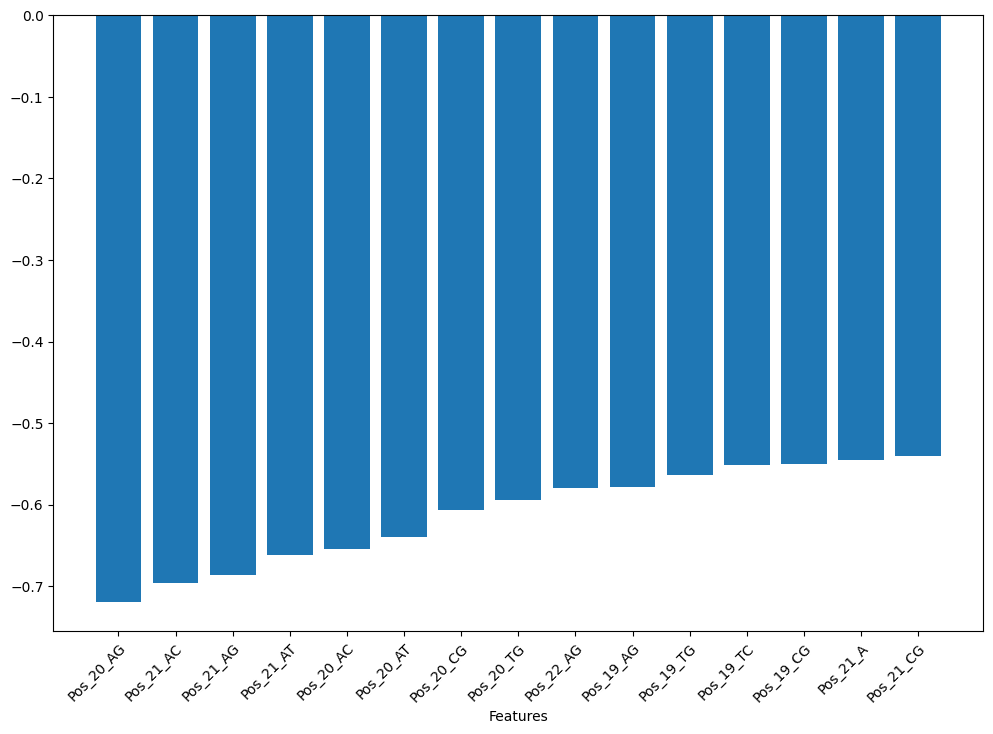

In [ ]:
features = """Pos_20_AG
Pos_21_AC
Pos_21_AG
Pos_21_AT
Pos_20_AC
Pos_20_AT
Pos_20_CG
Pos_20_TG
Pos_22_AG
Pos_19_AG
Pos_19_TG
Pos_19_TC
Pos_19_CG
Pos_21_A
Pos_21_CG"""

values = """-0.719164141
-0.6955389141
-0.6861007595
-0.6612524365
-0.65453706
-0.639447698
-0.6061387909
-0.5937527064
-0.5800316287
-0.5782359061
-0.5631385538
-0.5513531385
-0.5502162766
-0.5450265469
-0.5404693141"""

features = features.split()
values = values.split()
values = [float(x) for x in values]

print(features)
print(values)
visualize_importances(features, values, save_as="n310_pred.pdf")

['Pos_23_TG', 'Pos_22_TG', 'Pos_22_CG', 'Pos_22_AG', 'Pos_19_TC', 'Pos_18_CG', 'Pos_19_AT', 'Pos_19_AG', 'Pos_20_AT', 'Pos_19_AC', 'Pos_14_TC', 'Pos_18_AC', 'Pos_18_AG', 'Pos_19_CG', 'Pos_19_TG']
[-0.816329036, -0.7451006496, -0.6986417091, -0.6609805856, 0.4642634254, 0.4613781467, 0.4560911212, 0.447336403, 0.4462540221, 0.4388811487, -0.4297427887, 0.4295233436, 0.4284938294, 0.4184414058, 0.4171239856]
Pos_23_TG :  -0.816
Pos_22_TG :  -0.745
Pos_22_CG :  -0.699
Pos_22_AG :  -0.661
Pos_19_TC :  0.464
Pos_18_CG :  0.461
Pos_19_AT :  0.456
Pos_19_AG :  0.447
Pos_20_AT :  0.446
Pos_19_AC :  0.439
Pos_14_TC :  -0.430
Pos_18_AC :  0.430
Pos_18_AG :  0.428
Pos_19_CG :  0.418
Pos_19_TG :  0.417


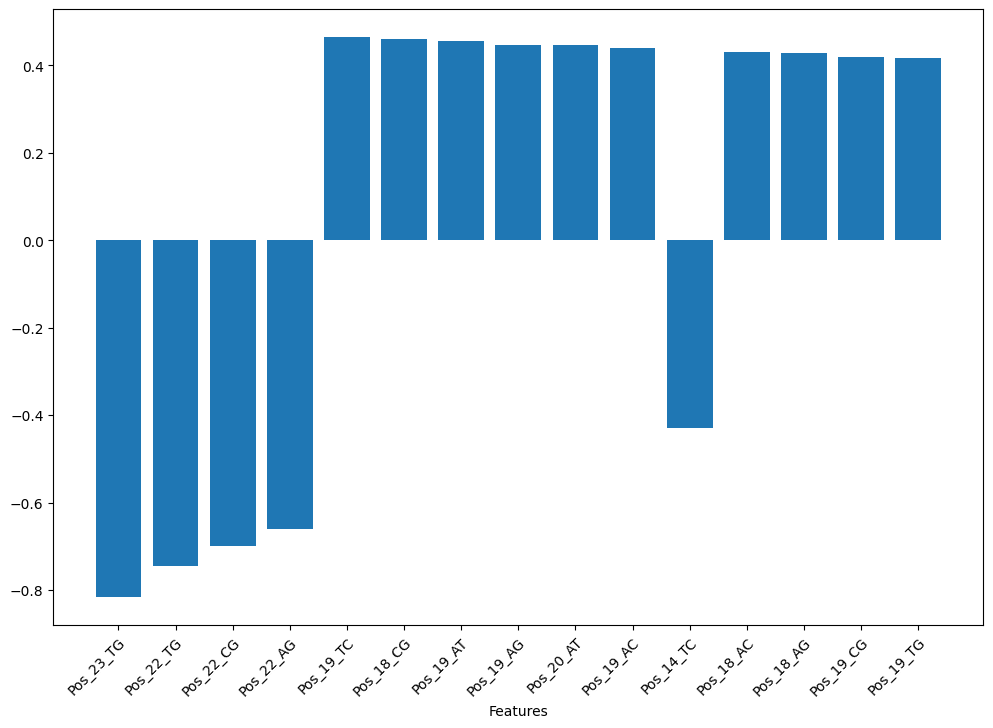

In [ ]:
features = """Pos_23_TG
Pos_22_TG
Pos_22_CG
Pos_22_AG
Pos_19_TC
Pos_18_CG
Pos_19_AT
Pos_19_AG
Pos_20_AT
Pos_19_AC
Pos_14_TC
Pos_18_AC
Pos_18_AG
Pos_19_CG
Pos_19_TG"""

values = """-0.816329036
-0.7451006496
-0.6986417091
-0.6609805856
0.4642634254
0.4613781467
0.4560911212
0.447336403
0.4462540221
0.4388811487
-0.4297427887
0.4295233436
0.4284938294
0.4184414058
0.4171239856"""

features = features.split()
values = values.split()
values = [float(x) for x in values]

print(features)
print(values)
visualize_importances(features, values, save_as="n215_pred.pdf")

# Layer Heatmap

In [ ]:
!pip install seaborn

##Layer 1 Data

In [ ]:
values = """-0.002712894456
0.0003249409168
0.01508091706
-0.000175399582
-0.001397429714
0.0004327580323
0.00003579835913
0.0002011418599
0.00003512103402
-0.001042826181
0.003060131764
-0.001514877981
-0.001189906998
-0.03580737898
-0.002450580427
-0.0006736903719
-0.0001237233518
-0.001019799156
-0.005622542938
-0.0000002291968513
-0.001230976403
0.0000724500273
-0.008017811584
-0.01091434435
-0.0007978912452
0.0003579451121
0.0000702539403
-0.001578735932
-0.007808367651
-0.01428047129
0.002902859405
0.002344853126
-0.004755162476
-0.0002182882972
-0.000834723011
0.01946199464
-0.01301525956
-0.005574018056
-0.001565519379
-0.00005441973352
0.00005500886075
-0.002574781233
-0.01715067953
-0.00004667479418
-0.001110137266
-0.001082564501
-0.002933802998
-0.003094709195
-0.001374154749
0.0002848839247
0.008468027772
0.000571673547
-0.0007202308743
-0.001386250224
-0.00321128989
-0.000002598875838
-0.00395219887
-0.0003583778982
0.0002638534312
-0.00245333681
-0.001527339841
-0.00006465100244
-0.000709863449
-0.0007722907897
-0.0009845919076
-0.00006044016971
-0.0001587623603
0.0006753678684
0.00006115641328
-0.001855199826
-0.002286717004
-0.001984178117
-0.000777418723
0.004430887748
-0.0309621033
0.00009285530997
-0.002077394591
-0.001478155906
-0.03208771916
-0.0009719922334
0.000050966253
-0.0003762272101
-0.004645981265
0.00001759521592
-0.003024283287
-0.00151277075
0.0000000003089266762
0.004741155454
-0.0005231225701
-0.0006890583055
-0.0005814257487
-0.0001932632115
0.007343609586
-0.0002476104241
0.00009413170483
-0.001147802342
0.002157051927
-0.003118164327
0.007543705241
0
0.000286329564
0.001604789521
-0.00009233029438
0.002027316739
0.0001446418576
-0.001633111567
0.00002789910497
0.0002273511936
0.004542896968
-0.001247867747
-0.00125310201
0.000001092113936
0.00005492039809
-0.0001331670398
-0.001908315159
-0.004673952279
0.001635702709
0.01097896637
-0.0007750143537
-0.001365768418
-0.0108146848
-0.001879194561
0.00004805237102
-0.001934641635
-0.001491355121
-0.00002794838028
0.00004494286678
-0.006402853937
-0.0033783107
-0.0005758271787
-0.002162272984
-0.003305653988
-0.0006280654443
0.0003020455432
-0.001077373989
-0.03663222383
-0.002780173868
-0.0005573598933
0.0007101020574
-0.02661837619
0.006939926836
0.00005007451473
0.007953984801
-0.0006085241698
0.00003957827624
-0.008375779253
-0.000627535972
-0.002351071374
0.01762400628
-0.0002997708671
-0.0008215715012
0.01055186025
-0.0006438586605
-0.00327706347
0.0001574861129
-0.002022986655
-0.000003032134388
-0.008961986943
-0.002607145316
-0.008731727184
-0.002362673379
0.00009673652296
-0.001779775659
0.01897396504
0.0000000003515962934
-0.003574038228
0.00009825548727
-0.005416624083
0
-0.00008891922185
0.00007536363816
0.00002868218769
-0.0002589088314
0.0009807744139
-0.000008516934955
-0.008820101226
-0.0007600327069
0.00006116959987
-0.00005256545669
-0.002075661155
-0.008618858534
-0.003594569864
0.00008803074175
-0.000246012148
-0.0008453962235
-0.00278840227
-0.0004774891341
-0.0009635396491
-0.03198322023
-0.0001293815229
0.0002613893961
-0.001414249271
-0.001317151582
-0.002136394523
-0.0009869052028
0.0001646312364
0.0000002963659149
0.0002058508902
-0.006348408309
0.0001595855675
0.0005737218359
0.00005521320012
-0.002907045337
-0.03587818056
-0.0002777067406
-0.0001298896413
-0.0009906060433
-0.001171403649
0.01417879115
-0.007935618855
0.00000001025717878
-0.0009815223259
-0.0002131492082
-0.002271894616
0.0001096985926
-0.04603868801
-0.0004309438965
0.01330615473
-0.01427562669
-0.0008338238196
-0.001214928938
-0.0005321794185
0.000001967288791
0.001952007004
-0.00138161543
-0.002544705734
-0.0002233348464
-0.02115071283
0.0001170986293
-0.001017158776
0.00008294377255
-0.00007459433265
-0.01977216239
-0.0001027185742
-0.001694922244
-0.003122015914
-0.001976152924
-0.00001359449865
-0.0003058808286
0.002065821037
-0.0000014702385
0.000193910344
-0.001587491104
0.00004218848907
-0.001167473308
-0.02693479943
0.001424473065
-0.008127414766
-0.0002003895023
0.0001066119462
0.00007130040557
-0.00199023954
0.004144798476
0.009324422593
0.01287711196
-0.0004601778265
0.0006695300951
0.00773349292
-0.001277139147
0.007072708679
0.0008311368603
-0.00001092869186
-0.0007126983097
-0.01269753836
0.003860229695
0.00003634122465
0.00005526412058
0.001328060248
0.004198254301
0.02841393964
-0.002360090388
-0.002396618764
-0.0003360064884
-0.0001088542311
-0.002589483566
0.01181874376
-0.002117515972
-0.001030383073
-0.003027618671
-0.03588734532
-0.002685596879
-0.004981850604
-0.000959467139
-0.005031309376
-0.001615458241
-0.00009541042656
0.0007520861207
-0.0003982676592
-0.001518338732
-0.001565904632
0.005882563702
-0.0009873186861
-0.0009101263653
-0.00002209562988
0.01406892859
0.0001439892122
0.02514740429
0.002598182733
-0.0009286953324
-0.002446766181
-0.002916975356
-0.04532089216
-0.03477446588
0.004689690926
0.000108622863
0.0002406766768
-0.002780091655
0.00008307790954
-0.0003656870648
-0.00004531806498
-0.04429380048
-0.0002891748741
-0.0032587871
0.001159074619
-0.002867688219
0.03156918184
-0.0146031115
0.0001775770884
-0.00004603034212
-0.0009273349572
-0.0007262545423
0.00004355642596
-0.00006581974877
-0.006746589158
0.01382043865
0.001287749701
-0.0004236241741
-0.001188623872
-0.00771419998
-0.002394588074
0.0007985395498
-0.001829435916
0.0001515430182
0.00005973001957
0.0001679187197
0.002438482743
-0.005992143642
0.0001469486831
-0.001378251733
-0.003031537199
-0.0002344570524
-0.005187624141
0.00008993563899
0.00001027559458
-0.002846622049
-0.001994738361
-0.003369573086
0.003956674107
-0.00001591156521
-0.003784636883
-0.02124287042
0.0004582969229
-0.00139181679
-0.0006302053665
-0.004036481564
0.004223549058
-0.0003396934096
-0.007888804312
-0.0005219062323
-0.0003276831845
0.002399996731
-0.007715586724
-0.002489680614
0.0001046830181
0.0001108479744
0.000004686811769
-0.001568900938
-0.002972327698
-0.001014272595
-0.02515898544
-0.001008148018
0.002592254229
-0.009952668698
0.0006208938613
0.002044214991
-0.002629174312
-0.02781535633
0.0003982625625
-0.001170190257
0.00005407525421
0.00008097998755
-0.003428302143
0
0.001547035365
-0.0004394101254
-0.001641533856
0.000002213028308
-0.0005382209473
-0.01584321579
-0.00003351407377
-0.0007283396786
-0.003435324147
-0.008671394638
-0.0001881876865
-0.002954660116
0.000000002846173888
0.000005480778186
-0.004323408581
-0.0001327564633
0.01645760068
-0.001151046083
-0.00333745732
0.000261670072
-0.001314646208
0.0000001487670814
-0.006902108948
-0.01238870963
0.0002323695041
-0.004224625938
0.0005570547945
0.02391107169
0.0000000006758871386
-0.002155996457
0.01688166699
-0.005072302875
-0.01147253596
-0.001497123234
-0.0001692469709
0.001944778421
0.0007946740985
0.00002139810453
-0.003137722151
-0.00006518065277
-0.0004874068817
0.0002726142027
0.00007124935042
-0.002417383076
-0.00009386993915
-0.02103402614
-0.003205252815
-0.01084338668
0.0001752351862
0.005995433127
-0.002855715754
-0.001435793072
-0.0001140859701
-0.004090910406
-0.005073124452
-0.02606607797
-0.016179929
-0.003676662493
0.000145120187
-0.0006146844485
0.01125591336
0
-0.0002356604289
-0.003366948462
0.0001025178108
-0.01694381722
-0.0007528079962
0.00002965471919
-0.002278762641
0.0001337995168
0.0003048218863
-0.0007174810938
0.002399337469
-0.0241511153
-0.001542820982
-0.00005691151061
0.000114340363
0.0001180153309
-0.0007476579547
-0.0005338584202
0.0001539960938
-0.0002659609293
0.000006583733921
-0.003068837315
-0.0000464314491
-0.00246769669
-0.002221628873
0.00007081163283
0.0001259204468
0.000000004556603513
-0.0008753117966
-0.008694404178
-0.04312129657
0.0002024037436
-0.01472006091
-0.001670470928
-0.00372937857
-0.002722729542
-0.03494307754
0.01904157007
-0.003070934994
0.02710668508
-0.008853334772
-0.0001659887872
-0.01483250226
0.000003669367019
0.0001986052178
-0.001523514168
-0.005510344675
-0.005564254057
-0.002099041723
-0.00008132159464
-0.001481311729
-0.0001235572261
0.006578174195
-0.001527351436
-0.0009248437954
-0.0005381883824
-0.001301905994
-0.0003594869056
0.00000002632648447
0.00008480555539
0.005774422625
0.0001878009103
0.00008607812845
-0.001589380931
0.00005085893939
-0.02336558911
0.009117308561"""

## Layer 1 Heatmap

In [ ]:
values = values.split()
values = [float(x) for x in values]

print(len(values))

512


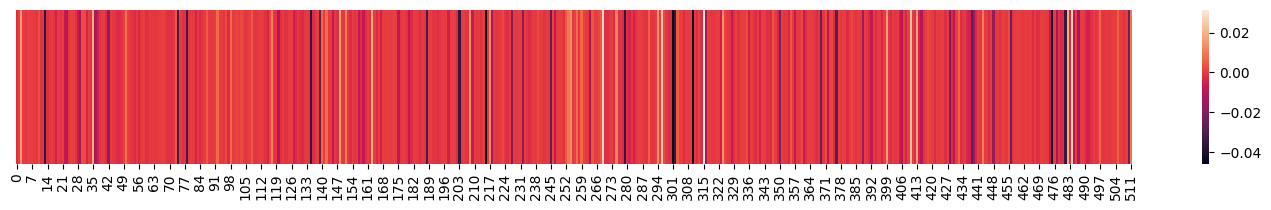

In [ ]:
import seaborn as sns

values = np.asarray(values)

plt.figure(figsize=(18,2))
sns.heatmap([values])
# plt.xticks([])
plt.yticks([])

plt.savefig(figure_dir + "layer_1_heatmap.pdf", bbox_inches='tight')
plt.show()


## Layer 2 Data

In [ ]:
values = """-0.0004923382291
-0.005509685937
-0.002636375553
-0.003487350429
-0.008274173
-0.001824636256
-0.009142937754
-0.005545413143
-0.002542600296
-0.003018483958
-0.006429870161
-0.004240784165
-0.001468528035
-0.004683353379
-0.003740041342
-0.002122419842
-0.002878704051
-0.006092324967
-0.00719400958
-0.002412446633
-0.003916845708
-0.001925332249
-0.004029404118
-0.002269090068
-0.0005629643018
-0.00280612194
-0.004324154553
-0.001044051892
-0.00233874681
-0.008666983889
-0.003188189089
-0.002316427328
-0.003161866863
-0.002575517904
-0.002448686588
-0.004507338765
-0.002355097166
-0.003443727222
-0.003067844209
-0.000978800667
-0.004697311703
-0.003102694683
-0.002252682791
-0.005169771025
-0.0006811669743
-0.003191610286
-0.007533908161
-0.004821328239
-0.00605638973
-0.0007230797167
-0.003706429685
-0.009494415591
-0.001980909097
-0.002223420742
-0.003034565728
-0.004324497296
-0.004922752931
-0.002002626774
-0.003113242609
-0.001733765221
-0.003089351932
-0.00696050436
-0.000837295738
-0.00216510455
-0.006687291101
-0.004134386189
-0.001627425998
-0.009182401977
-0.004629643587
-0.0019575609
-0.004122935785
-0.005128021029
-0.001853244695
-0.001804673078
-0.004525366197
-0.002199364231
-0.004700996669
-0.002404509732
-0.00526457234
-0.009982037381
-0.002679802792
-0.006358322047
-0.0002808155257
-0.005038929883
-0.002182278949
-0.0001871711574
-0.003723115015
-0.003348067438
-0.000896528637
-0.005899183158
-0.00005327252049
-0.009453938416
-0.003981101015
-0.00703832898
-0.002662095494
-0.0005980513364
-0.0005121296919
-0.003523981889
-0.005026556686
0.00008855644212
-0.003737858308
-0.001853519957
-0.004095354452
-0.003099277458
-0.005752262372
-0.001362598408
-0.005692029086
-0.001338296068
-0.006285355679
-0.003675774038
-0.007647368351
-0.00180102256
-0.002710025479
-0.00268617186
-0.005686065217
-0.007082932644
-0.003415614318
-0.006885110048
-0.003797294733
-0.003179503169
-0.001038421346
-0.004327126065
-0.002567384545
-0.00268176377
0.0001257119839
-0.005579034399
-0.006680640778
-0.007106731857
-0.003262564251
-0.002346533883
-0.00435203034
-0.004625062875
-0.000786949537
-0.002055965174
-0.005856218182
-0.001335257526
-0.003319684059
-0.006256164766
-0.00003398179377
-0.0006335970879
-0.004552605942
-0.002867066675
-0.003960661631
-0.002147044263
-0.008153557319
-0.003549983431
-0.001643794292
-0.0008817340307
-0.001568374492
-0.004220263754
-0.001714933062
-0.0008469060599
-0.002377676749
-0.004654885895
-0.00556879507
-0.00337260849
-0.002343701181
-0.002655625938
-0.00165964029
-0.006430962786
-0.003401631249
-0.0002348835678
-0.005413155429
-0.001196149785
-0.002568725222
-0.001311722215
-0.002238559337
-0.002688345901
-0.001532628775
-0.005636101034
-0.0001446061
-0.003733576631
-0.005549543161
-0.001404233293
-0.0004195187683
-0.007074350201
-0.004137700694
-0.001053259489
-0.004067175211
-0.005393938787
-0.00243957589
-0.001464599179
0.000001618036058
0
-0.003412907631
-0.002032646029
-0.001914196255
-0.0006406536257
-0.008270795803
-0.0004633536151
-0.004861994186
-0.00444655396
-0.003224904332
-0.008128839543
-0.005361432312
-0.006181730271
-0.004352644224
-0.005711460687
-0.001504599639
-0.005889627295
-0.005751808558
-0.001564599959
-0.000888710119
-0.004744629793
-0.003106473763
-0.005598404133
-0.003521945471
-0.004687868998
-0.00237949142
-0.0029750541
-0.003701232707
-0.002701121902
-0.003355310711
-0.004369050118
-0.003484168816
-0.004988132498
-0.00008752168189
-0.003072718942
-0.004356485771
-0.006947106026
-0.004120886184
-0.00283599494
-0.001739907205
-0.0025853269
-0.005599367419
-0.004229841353
-0.002611107048
-0.0028491902
-0.004647792732
-0.002932040917
-0.003793714227
-0.005222260502
-0.003359260554
-0.004428190257
-0.002742933256
-0.006035894091
-0.00112880836
-0.0001021477434
-0.0005865707103
-0.002520315881
-0.00520501317
-0.003037901993
-0.0004879576587
-0.007329020086
-0.002112995477
-0.004067127931
-0.003368159401
-0.008317920207
-0.006950327634
-0.0006375152479
-0.002139433667
0.000172324177
-0.00634123387
-0.001519267962
-0.001079887476
-0.006594262062"""

## Layer 2 Heatmap

In [ ]:
values = values.split()
values = [float(x) for x in values]

print(len(values))

256


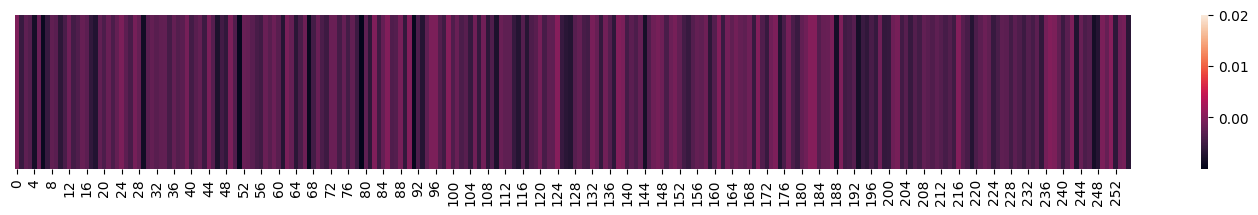

In [ ]:
import seaborn as sns

values = np.asarray(values)

plt.figure(figsize=(18,2))

sns.heatmap([values], vmax=0.02)
# plt.xticks([])
plt.yticks([])

plt.savefig(figure_dir + "layer_2_heatmap.pdf", bbox_inches='tight')
plt.show()


# Electra Plots

In [ ]:
# Helper method to print importances and visualize distribution
def visualize_importances(feature_names, importances, plot=True, axis_title="Features", save_as="plt.pdf"):
    # print(title)
    for i in range(len(feature_names)):
        print(feature_names[i], ": ", '%.3f'%(importances[i]))
    x_pos = (np.arange(len(feature_names)))
    if plot:
        plt.figure(figsize=(12,8))
        plt.bar(x_pos, importances, align='center')
        plt.xticks(x_pos, feature_names, wrap=True)
        plt.xticks(rotation=45, ha='right')
        plt.xlabel(axis_title)
        # plt.figure(figsize=(12,8))
        plt.savefig(figure_dir + save_as, bbox_inches='tight')
        # plt.title(title)

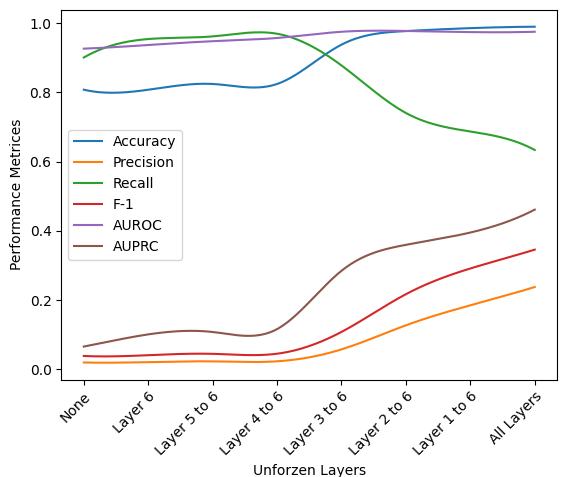

In [ ]:
import numpy as np
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

# Dataset
y_acc = np.array([0.8078 , 0.8077 , 0.8244 , 0.8243 , 0.9380 , 0.9772 , 0.9857 , 0.9898])
y_pre = np.array([0.0197 , 0.0208 , 0.0229 , 0.0231 , 0.0576 , 0.1271 , 0.1848 , 0.2378])
y_re = np.array([0.9008 , 0.9542 , 0.9618 , 0.9695 , 0.8779 , 0.7405 , 0.6870 , 0.6336])
y_f1 = np.array([0.0385 , 0.0407 , 0.0447 , 0.0450 , 0.1080 , 0.2170 , 0.2913 , 0.3458])
y_auroc = np.array([0.9264 , 0.9369 , 0.9479 , 0.9572 , 0.9752 , 0.9775 , 0.9742 , 0.9752])
y_auprc = np.array([0.0657 , 0.1009 , 0.1078 , 0.1161 , 0.2846 , 0.3596 , 0.3951 , 0.4613])

x = np.array([0, 1, 2, 3, 4, 5, 6, 7])

B_acc = make_interp_spline(x, y_acc)
B_pre = make_interp_spline(x, y_pre)
B_re = make_interp_spline(x, y_re)
B_f1 = make_interp_spline(x, y_f1)
B_auroc = make_interp_spline(x, y_auroc)
B_auprc = make_interp_spline(x, y_auprc)

x = np.linspace(0, 7, 200)

Y_acc = B_acc(x)
Y_pre = B_pre(x)
Y_re = B_re(x)
Y_f1 = B_f1(x)
Y_auroc = B_auroc(x)
Y_auprc = B_auprc(x)

# Returns evenly spaced numbers
# over a specified interval.
# Plotting the Graph
plt.plot(x, Y_acc)
plt.plot(x, Y_pre)
plt.plot(x, Y_re)
plt.plot(x, Y_f1)
plt.plot(x, Y_auroc)
plt.plot(x, Y_auprc)

plt.xlabel("Unforzen Layers")
plt.ylabel("Performance Metrices")

plt.legend(["Accuracy", "Precision", "Recall", "F-1", "AUROC", "AUPRC"])

x_labels = ["None" , "Layer 6" , "Layer 5 to 6" , "Layer 4 to 6" , "Layer 3 to 6" ,
            "Layer 2 to 6" , "Layer 1 to 6" , "All Layers"]
x_org = np.array([0,1,2,3,4,5,6,7])
plt.xticks(x_org, x_labels, wrap=True)
plt.xticks(rotation=45, ha='right')

plt.savefig(figure_dir + "Electra-Graph.pdf", bbox_inches='tight')
plt.show()

# Comparisons

[['Accuracy', 0.989, 0.997, 0.997, 0.99, 0.996, 0.995, 0.987, 0.996, 0.997, 0.996], ['Precision', 0.268, 0.734, 0.689, 0.238, 0.546, 0.316, 0.166, 0.5, 0.65, 0.882], ['Recall', 0.886, 0.611, 0.626, 0.634, 0.366, 0.092, 0.512, 0.748, 0.481, 0.115], ['F-1', 0.411, 0.667, 0.656, 0.346, 0.438, 0.142, 0.251, 0.599, 0.553, 0.203], ['AUROC', 0.987, 0.99, 0.991, 0.975, 0.954, 0.965, 0.965, 0.987, 0.96, 0.987], ['AUPRC', 0.571, 0.721, 0.686, 0.461, 0.343, 0.367, 0.309, 0.678, 0.508, 0.61]]


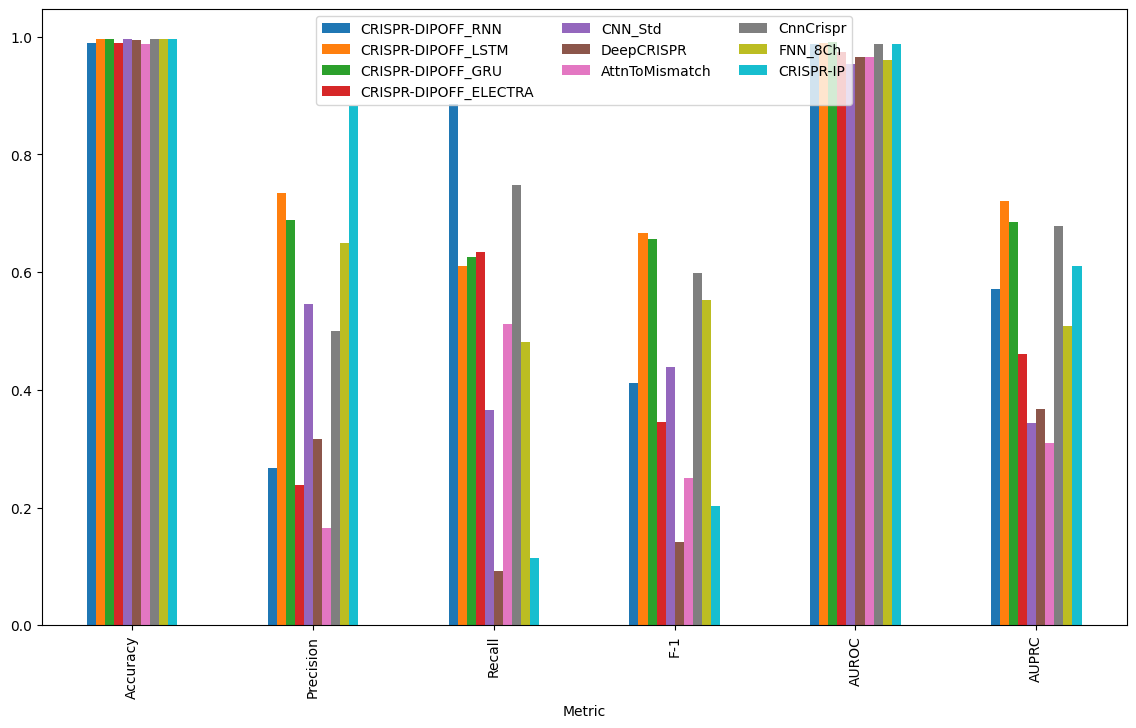

In [7]:
# Library Import(numpy and matplotlib)
import pandas as pd
import matplotlib.pyplot as plt


_data = [
["RNN" , 0.989 , 0.268 , 0.886 , 0.411 , 0.987 , 0.571],
["LSTM" , 0.997 , 0.734 , 0.611 , 0.667 , 0.990 , 0.721],
["GRU" , 0.997 , 0.689 , 0.626 , 0.656 , 0.991 , 0.686],
["ELECTRA" , 0.990 , 0.238 , 0.634 , 0.346 , 0.975 , 0.461],
["CNN_Std" , 0.996 , 0.546 , 0.366 , 0.438 , 0.954 , 0.343],
["DeepCRISPR" , 0.995 , 0.316 , 0.092 , 0.142 , 0.965 , 0.367],
["AttnToMismatch" , 0.987 , 0.166 , 0.512 , 0.251 , 0.965 , 0.309],
["CnnCrispr" , 0.996 , 0.500 , 0.748 , 0.599 , 0.987 , 0.678],
["FNN_8Ch" , 0.997 , 0.650 , 0.481 , 0.553 , 0.960 , 0.508],
["CRISPR-IP" , 0.996 , 0.882 , 0.115 , 0.203 , 0.987 , 0.610]]

_data_invert = [["Accuracy"], ["Precision"], ["Recall"], ["F-1"], ["AUROC"], ["AUPRC"]]

models = ["Metric","CRISPR-DIPOFF_RNN", "CRISPR-DIPOFF_LSTM" ,"CRISPR-DIPOFF_GRU", "CRISPR-DIPOFF_ELECTRA","CNN_Std", "DeepCRISPR", "AttnToMismatch", "CnnCrispr", "FNN_8Ch", "CRISPR-IP"]

for i in range(len(_data)):
    for j in range(1, len(_data[i])):
        _data_invert[j-1].append(_data[i][j])

print(_data_invert)


# Make a data definition
# _data=[
#         ["Team A",4, 8, 7],
#         ["Team B",4, 6, 5],
#         ["Team C",8, 11, 6],
#         ["Team D",9, 8, 4]
# ]

# Draw a multi-colored bar chart.
_df = pd.DataFrame(_data_invert,columns=models)


_df.plot(x="Metric", y=models[1:],  kind="bar",figsize=(14,8))
plt.legend(ncol=3)

plt.savefig(figure_dir + "model_comp_bar.pdf", bbox_inches='tight')

# Display the plot
plt.show()

## Data

In [ ]:
!pip install pickle5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp310-cp310-linux_x86_64.whl size=256417 sha256=5c3f9da8f149212252f16fbf67ca752ffaa489267d3a76aac9cfb3015503109e
  Stored in directory: /root/.cache/pip/wheels/7d/14/ef/4aab19d27fa8e58772be5c71c16add0426acf9e1f64353235c
Successfully built pickle5


In [ ]:
import pickle5 as pkl



dict_keys(['test_x', 'test_y', 'pred_y', 'attributions', 'config', 'feature_importance', 'neuron_attributions'])


In [ ]:
print(type(data["config"]))
print(data["config"])

<class 'dict'>
{'vocab_size': 0, 'emb_size': 5, 'hidden_size': 512, 'lstm_layers': 1, 'bi_lstm': True, 'number_hidder_layers': 2, 'dropout_prob': 0.1, 'reshape': False, 'batch_size': 256, 'epochs': 80, 'learning_rate': 5e-05}
